<a href="https://colab.research.google.com/github/mkimitch/generative-ai-jupyter-notebooks/blob/main/Demo_01_ROUGE_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demo: ROUGE Benchmark**

This demo is designed to read a PDF file and a summary of that file, and then compute the ROUGE scores for the summary by comparing it with the original document. The ROUGE scores provide a measure of the quality of the summary.

**Note:**

*   Use the **SUMMARY.txt** generated from the **Demo: Text_Summarizer**.



### **Steps to Perform:**


*   Step 1: Import the Necessary Libraries
*   Step 2: Read the PDF File
*   Step 3: Read the Summary File
*   Step 4: Load the ROUGE Metric

https://huggingface.co/spaces/evaluate-metric/rouge

In [ ]:
! pip install -q evaluate  rouge_score PyPDF2
#! PIP install transformers

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 21.6 MB/s eta 0:00:00


### **Step 1: Import the Necessary Libraries**

In [ ]:
# Import the libraries
import os
import PyPDF2
from evaluate import load
import pandas as pd

### **Step 2: Read the PDF File**

*   Open the PDF file.
*   Create a **PdfReader** object for the PDF file.
*   Extract the text from each page of the PDF and concatenate it into a single string.


In [ ]:
# Define the PDF file path
pdf_path = "arxiv_impact_of_GENAI.pdf"

# Check if the PDF file exists
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"Error: PDF file '{pdf_path}' not found.")

# Read the PDF file
with open(pdf_path, "rb") as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    document_text = ""
    for page in pdf_reader.pages:
        page_text = page.extract_text()
        if page_text:
            document_text += page_text + " "
        else:
            print(f" Warning: Could not extract text from a page.")


### **Step 3: Read the Summary File**

*   Open the summary file and read its content.

In [ ]:
# Define summary file paths
human_summary_path = "Summary.txt"
ai_summary_path = "SUMMARY.txt"

# Check if summary files exist
if not os.path.exists(human_summary_path):
    raise FileNotFoundError(f"Error: Human summary file '{human_summary_path}' not found.")
if not os.path.exists(ai_summary_path):
    raise FileNotFoundError(f"Error: AI summary file '{ai_summary_path}' not found.")

# Read summaries
with open(human_summary_path, "r", encoding="utf-8") as f:
    human_summary = f.read()

with open(ai_summary_path, "r", encoding="utf-8") as f:
    ai_summary = f.read()


### **Step 4: Load the ROUGE metric**

*   Load the ROUGE metric.
*   Compute the ROUGE scores for the summary.
*   Print the scores.



In [ ]:
def preprocess_text(text):
    """Cleans and normalizes text for better ROUGE evaluation."""
    text = text.replace("\n", " ")  # Remove newlines
    text = text.lower().strip()  # Convert to lowercase & remove extra spaces
    return text

# Preprocess all texts
document_text = preprocess_text(document_text)
human_summary = preprocess_text(human_summary)
ai_summary = preprocess_text(ai_summary)

In [ ]:
# Load ROUGE metric
metric = load("rouge")

# Compute ROUGE scores for Human Summary
human_scores = metric.compute(predictions=[human_summary], references=[document_text])

# Compute ROUGE scores for AI-Generated Summary
ai_scores = metric.compute(predictions=[ai_summary], references=[document_text])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Convert ROUGE scores to DataFrame
human_scores_df = pd.DataFrame(human_scores, index=["Human Summary"]).T.round(4)
ai_scores_df = pd.DataFrame(ai_scores, index=["AI Summary"]).T.round(4)

# Combine both scores into a single DataFrame
comparison_df = pd.concat([human_scores_df, ai_scores_df], axis=1)

# Display ROUGE score comparison in a table format
print("\n ROUGE Score Comparison")
print(comparison_df)



 ROUGE Score Comparison
           Human Summary  AI Summary
rouge1            0.1028      0.0940
rouge2            0.0774      0.0331
rougeL            0.0740      0.0585
rougeLsum         0.0740      0.0585


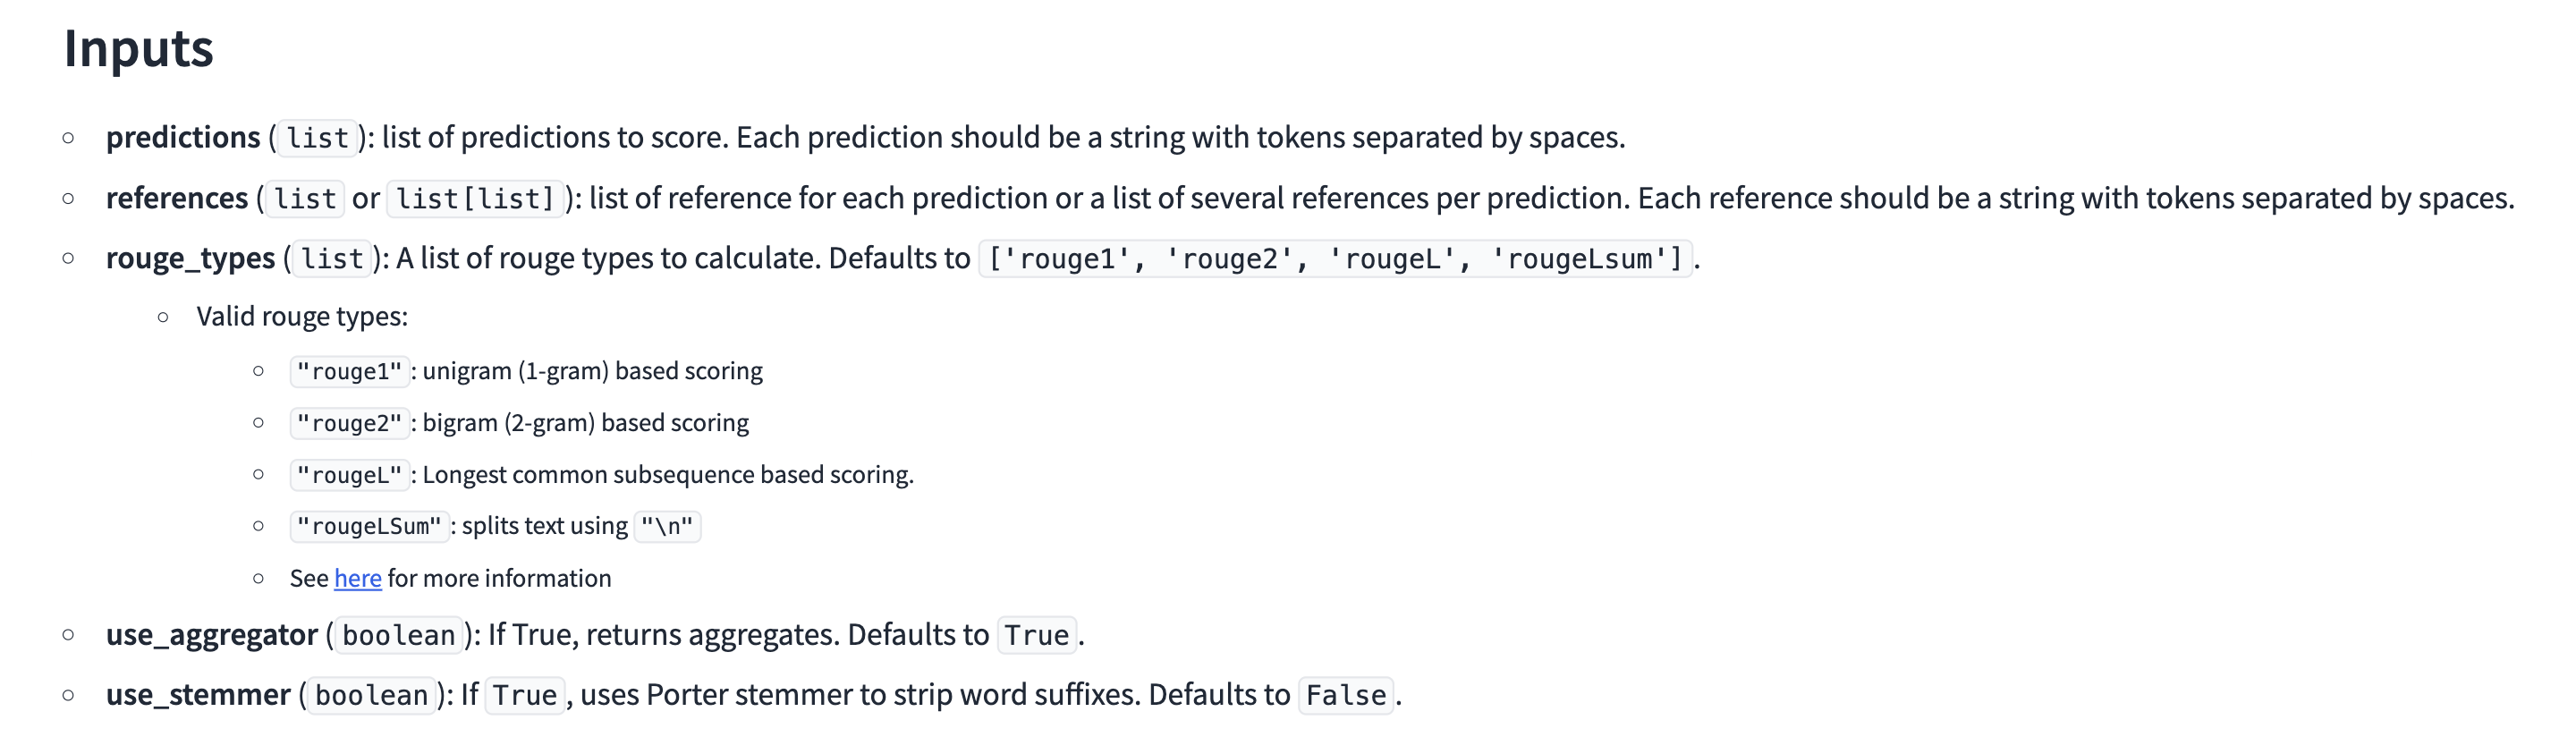

https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard#/

### **Conclusion**

The ROUGE score output shows the F-measure for different versions of the ROUGE metric: ROUGE-1, ROUGE-2, and ROUGE-L. These scores provide a measure of how well the summary matches the reference document. The higher the score (closer to 1), the better the match between the summary and the original text.